<a href="https://colab.research.google.com/github/tilin1841j/poblacion_localidad/blob/main/cloropleta_dataframe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import geopandas as gdp

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Fuentes de Datos espaciales
* Las que nosotros contruyamos
* Repositorios externos:

In [ ]:
gdf_localidades = gdp.read_file("localidades.json")
gdf_localidades

In [ ]:
gdf_localidades.crs

In [7]:
gdf_localidades.to_crs(epsg=9377, inplace=True)

In [ ]:
gdf_localidades

In [9]:
gdf_localidades["area"]=gdf_localidades.area/1000000

In [10]:
gdf_localidades["centroide"]=gdf_localidades.centroid

In [11]:
# calcular la distancia de la UD sede 40 al centroide de cada localidad

# si es necesario, convertiur el CRS original al 9733

#darle a la ud sede calle 40 un crs


In [12]:
gdf_localidades["centroide"]=gdf_localidades.centroid

In [13]:
puntos = [(4.62055556, -74.06586111)]

In [14]:
from shapely.geometry import Point


In [15]:
latitud = 4.62055556
longitud = -74.06586111


In [16]:
punto = gdp.GeoDataFrame(geometry=[Point(longitud, latitud,)], crs ='EPSG:4326')

In [17]:
punto.to_crs(epsg=9377, inplace=True)

In [18]:
gdf_localidades["distancia"]=gdf_localidades.centroid.distance(punto.geometry.iloc[0])

In [ ]:

gdf_localidades


# explicacion tarea


In [ ]:
universidad = Point(-74.06586111, 4.62055556)
universidad

In [ ]:
universidad= gdp.GeoSeries(universidad, crs=4326)
universidad

In [ ]:
universidad= universidad.to_crs(epsg=9377)
universidad


In [ ]:
gdf_localidades["distancia_u"]= [float(universidad.distance(centroi)/1000) for centroi in gdf_localidades.centroide ]
gdf_localidades

<Axes: >

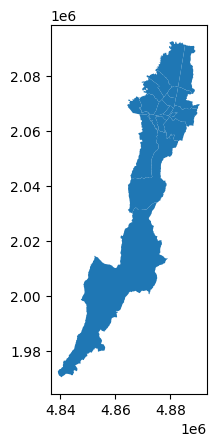

In [25]:
gdf_localidades.plot()

In [ ]:
#Agregar capas
mapa= gdf_localidades.plot(figsize=(10,10))
gdf_localidades[centroide].plot(ax=mapa, color="white")


In [ ]:
ax= localidades.plot(figsize=(10,10))

localidades["centroide"].plot(ax=ax, color="white")
universidad.plot(ax=ax, color='blakc', marker='+')

In [ ]:
mapa_2= gdf_localidades.plot(
    column= 'LocNombre',
    figsize=(15,15),
    edgecolor='black',
    cmap= 'tab20',
    legend= True,
    legend_kwds ={
        'loc':'upper left'
    }
)

In [ ]:
import contextily as ctx


ax= gdf_localidades.plot(
    columna='LocNombre',
    figsize=(15,15),
    edgecolor='black',
    alpha=0.8,
    legend=True,
    cmpa='tab20',
    legend_kwds={'loc':'upper left'}
)


# Agregacion de datos
1. agregar atritubos (series no geograficos al geodataframe) desde otro geodataframe
2. mezclar dos geodataframe teniendo en cuenta la relacion espacial entre dos de sus geometrias

In [60]:
import pandas as pd
población =pd.read_csv("poblacion.localidades.csv", encoding='latin1', delimiter=";")
población.head()


,Año,Cod_Loc,Localidad,Sexo,Edad,Grupo_Edad,Población
0,2005,1,Usaquén,Hombres,0,00 a 04,2909
1,2005,1,Usaquén,Hombres,1,00 a 04,2954
2,2005,1,Usaquén,Hombres,2,00 a 04,2919
3,2005,1,Usaquén,Hombres,3,00 a 04,2989
4,2005,1,Usaquén,Hombres,4,00 a 04,3079


In [61]:
población_2024 = poblacion[población['Año'] == 2024]
población_2024.head()

,Año,Cod_Loc,Localidad,Sexo,Edad,Grupo_Edad,Población
76760,2024,1,Usaquén,Hombres,0,00 a 04,3128
76761,2024,1,Usaquén,Hombres,1,00 a 04,3147
76762,2024,1,Usaquén,Hombres,2,00 a 04,3139
76763,2024,1,Usaquén,Hombres,3,00 a 04,3106
76764,2024,1,Usaquén,Hombres,4,00 a 04,3037


In [63]:
#Agrupar los datos por localidad
grupos = población_2024.groupby('Localidad')
población_2024.head()
# sumar cada localidad
total_población_localidad = grupos["población"].sum()
print(total_población_localidad)

KeyError: 'Column not found: población'

In [ ]:
df_población_localidad = total_población_localidad

In [ ]:
df_poblacion_localidad['Localidad']



def replace_accents(input_str):
  replacements ={
      'Á': 'A',
      'É': 'E',
      'Í': 'I'.
      'Ó': 'O',
      'Ú': 'U',
  }
  for accented_char, unaccented_char in replacement.items():
    input_str = input_str.replace(accents_char, unaccented_char)
    return input_str


  df_poblacion_localidad['Localidad'] = df_poblacion_localidad['Localidad'].apply(replace_accents)